# Dataset Gym_Member_Tracking

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 1. Mengimport Dataset

In [3]:
df = pd.read_csv("C://Users//Asus//OneDrive//Documents//UPN//Perkuliahan//Semester 3//Analisis Data Eksploratif//Tugas Kelompok//Regresi//gym_members_exercise.csv")
df.head()

,Age,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1.69,1313,Yoga,12.6,3.5,4,3,30.20
1,46,1.30,883,HIIT,33.9,2.1,4,2,32.00
2,32,1.11,677,Cardio,33.4,2.3,4,2,24.71
3,25,0.59,532,Strength,28.8,2.1,3,1,18.41
4,38,0.64,556,Strength,29.2,2.8,3,1,14.39


## 2. Mengubah variabel Workout_Type Menjadi Numerik

In [4]:
# Ubah Workout_Type menjadi numeric (0 = Yoga, 1 = Strength, 2 = HIIT, 3 = Cardio)
workout_mapping = {
    'Yoga': 0,
    'Strength': 1,
    'HIIT': 2,
    'Cardio': 3
}
df['Workout_Type'] = df['Workout_Type'].map(workout_mapping)
df.head()

,Age,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1.69,1313,0,12.6,3.5,4,3,30.20
1,46,1.30,883,2,33.9,2.1,4,2,32.00
2,32,1.11,677,3,33.4,2.3,4,2,24.71
3,25,0.59,532,1,28.8,2.1,3,1,18.41
4,38,0.64,556,1,29.2,2.8,3,1,14.39


## 3. Menentukan Variabel Independen dan Dependennya

In [5]:
# Mengganti nama Variabel
df.rename(columns={"Age":"x1", "Session_Duration (hours)" : "x2", "Fat_Percentage" : "x3", "Water_Intake (liters)" : "x4", "Workout_Frequency (days/week)" : "x5", "Experience_Level" : "x6", "BMI" : "x7", "Workout_Type" : "x8",  "Calories_Burned" : "y"}, inplace=True)
df.head()

,x1,x2,y,x8,x3,x4,x5,x6,x7
0,56,1.69,1313,0,12.6,3.5,4,3,30.20
1,46,1.30,883,2,33.9,2.1,4,2,32.00
2,32,1.11,677,3,33.4,2.3,4,2,24.71
3,25,0.59,532,1,28.8,2.1,3,1,18.41
4,38,0.64,556,1,29.2,2.8,3,1,14.39


## 4. Mengetahui Seberapa Kuat Hubungan Variabel Dependen dan Independen Menggunakan Metode Korelasi

In [6]:
# Menghitung nilai korelasi Pearson
from scipy.stats import pearsonr

# Convert dataframe into series
list1 = df['x2']
list2 = df['y']
corr, _ = pearsonr(list1, list2)
print('Koefisien Pearson: %.5f' % corr)

Koefisien Pearson: 0.90814


In [7]:
# Menghitung Korelasi Biserial Poin Desain Mobil VS Harga Jual Mobil
import scipy.stats as stats
stats.pointbiserialr(df['x8'], df['y'])

SignificanceResult(statistic=-0.01885888961561097, pvalue=0.5568273764671917)

<Axes: >

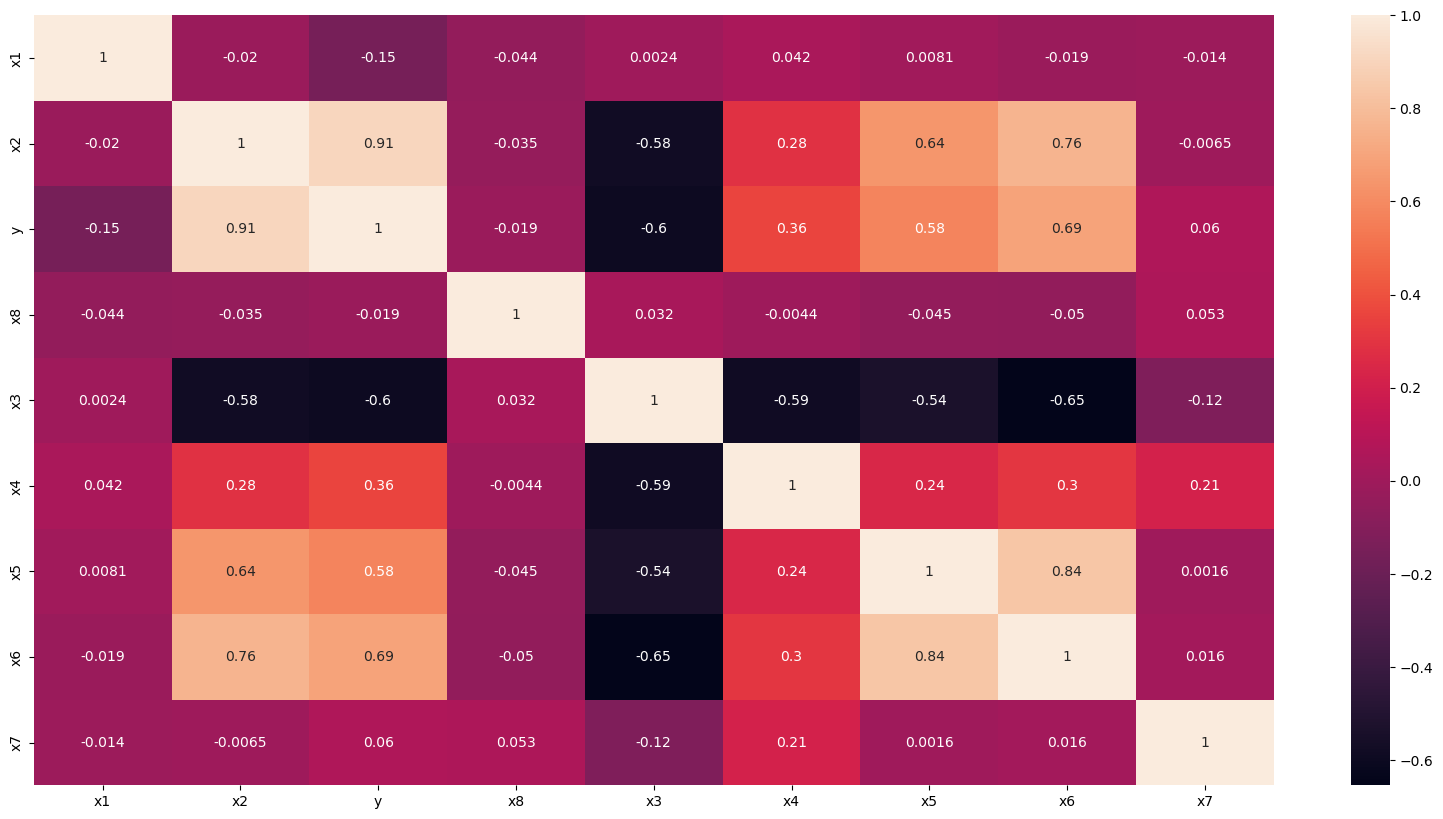

In [8]:
#plotting heatmap for overall data set
corr= df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr,annot=True)

## 5. Membentuk Model Regresi Dummy

In [9]:
# Memodelkan dengan Regresi Dummy
import numpy as np
import statsmodels.formula.api as smf
df_with_dummies = pd.get_dummies(data=df, columns=['x8'])
x = df_with_dummies[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7','x8_0', 'x8_1', 'x8_2', 'x8_3']]
y = df_with_dummies['y']
reg_mod = 'y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8_0 + x8_1 + x8_2 + x8_3'
model = smf.ols(formula=reg_mod, data=df_with_dummies).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     588.2
Date:                Sat, 23 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:39:23   Log-Likelihood:                -5882.3
No. Observations:                 973   AIC:                         1.179e+04
Df Residuals:                     962   BIC:                         1.184e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     93.6271     36.765      2.547      0.0

In [10]:
# Nilai prediksi Y Topi
prediksi = model.predict(x)
print(prediksi.head())

0    1205.247245
1     871.514848
2     782.560512
3     459.245306
4     471.877717
dtype: float64


In [11]:
# Nilai residual
residual = model.resid
print(residual.head())

0    107.752755
1     11.485152
2   -105.560512
3     72.754694
4     84.122283
dtype: float64


## 6. Melakukan Uji F

In [12]:
# Melakukan Uji F
import scipy.stats
alpha = 0.05
df1 = 7 # Banyak variabel - 1
df2 = 965 # Banyak sampel - Banyak variabel
F_tabel = stats.f.ppf(1 - alpha, df1, df2)
print('Hasil dari F tabel adalah', F_tabel)

# Keputusan
F_statistic = model.fvalue
if F_statistic > F_tabel:
  print("Sehingga H0 ditolak yang artinya minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya.")
else:
  print("Sehingga H0 diterima yang artinya tidak ada satupun variabel independen yang berpengaruh terhadap variabel dependennya.")

Hasil dari F tabel adalah 2.019051729264118
Sehingga H0 ditolak yang artinya minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya.


## 7. Mendapatkan Nilai R-Squared

In [13]:
# Nilai R-Squared

r_squared = """
Nilai R-Squared Adjusted yang didapatkan dalam tabel model regresi dummy di atas adalah 0.858,
sehingga dapat disimpulkan sebesar 85,8% Age, Session_Duration (hours),	Workout_Type,	Fat_Percentage,	Water_Intake (liters),Workout_Frequency (days/week),Experience_Level, dan	BMI  memengaruhi Calories_Burned.
Sisanya 14.2% dipengaruhi oleh variabel lainnya yang tidak diketahui.
"""
print(r_squared)


Nilai R-Squared Adjusted yang didapatkan dalam tabel model regresi dummy di atas adalah 0.858,
sehingga dapat disimpulkan sebesar 85,8% Age, Session_Duration (hours),	Workout_Type,	Fat_Percentage,	Water_Intake (liters),Workout_Frequency (days/week),Experience_Level, dan	BMI  memengaruhi Calories_Burned.
Sisanya 14.2% dipengaruhi oleh variabel lainnya yang tidak diketahui.



## 8. Melakukan Uji T

In [61]:
# Menggunakan scipy untuk menguji hipotesis Uji T
from scipy import stats
import statsmodels.api as sm

alpha = 0.05
df = 965 #Banyak sampel - Banyak variabel
T_tabel = stats.t.ppf(1-alpha/2, df)
print('Hasil dari T tabel adalah', T_tabel)

# Keputusan Age
print("\nUji Hipotesis untuk Age:")
T_hitung_x1 = model.tvalues['x1']
if T_hitung_x1 > T_tabel:
    print("Nilai dari T hitung Age adalah", T_hitung_x1)
    print("Sehingga H0 ditolak yang artinya variabel Age berpengaruh signifikan terhadap variabel Calories_Burned.")
else:
    print("Nilai dari T hitung Age adalah", T_hitung_x1)
    print("Sehingga H0 diterima yang artinya variabel Age tidak berpengaruh signifikan terhadap variabel Calories_Burned.")

# Keputusan Workout_Type_Cardio
print("\nUji Hipotesis untuk Workout_Type_Cardio:")
T_hitung_x2 = model.tvalues['x8_3']
if T_hitung_x2 > T_tabel:
    print("Nilai dari T hitung Workout_Type_Cardio adalah", T_hitung_x2)
    print("Sehingga H0 ditolak yang artinya variabel Workout_Type_Cardio berpengaruh signifikan terhadap variabel Calories_Burned.")
else:
    print("Nilai dari T hitung Workout_Type_Cardio adalah", T_hitung_x2)
    print("Sehingga H0 diterima yang artinya variabel Workout_Type_Cardio tidak berpengaruh signifikan terhadap variabel Calories_Burned.")

Hasil dari T tabel adalah 1.962425330494157

Uji Hipotesis untuk Age:
Nilai dari T hitung Age adalah -11.556086545834265
Sehingga H0 diterima yang artinya variabel Age tidak berpengaruh signifikan terhadap variabel Calories_Burned.

Uji Hipotesis untuk Workout_Type_Cardio:
Nilai dari T hitung Workout_Type_Cardio adalah 2.2914614477429454
Sehingga H0 ditolak yang artinya variabel Workout_Type_Cardio berpengaruh signifikan terhadap variabel Calories_Burned.


## 9. Melakukan Uji Z

In [39]:
# Menggunakan scipy untuk menguji hipotesis Uji T
from scipy import stats
import statsmodels.api as sm

sample_size = 965  # Jumlah sampel
alpha = 0.05
Z_tabel = stats.norm.ppf(1-alpha/2)
print('Hasil dari Z tabel adalah', Z_tabel)

# Menghitung statistik untuk Age
sample_mean_age = model.params['x1']  # Mean dari koefisien x1
std_error_age = model.bse['x1']  # Standard error dari x1
population_mean_age = 0  # Nilai hipotesis nol (biasanya 0 untuk uji signifikansi)
population_std_age = std_error_age * np.sqrt(sample_size)

Z_hitung_age = (sample_mean_age - population_mean_age) / (std_error_age)

# Keputusan untuk Age
print("\nUji Hipotesis untuk Age:")
print("Nilai dari Z hitung Age adalah", Z_hitung_age)
if abs(Z_hitung_age) > Z_tabel:
    print("Sehingga H0 ditolak yang artinya variabel Age berpengaruh signifikan terhadap variabel Calories_Burned.")
else:
    print("Sehingga H0 diterima yang artinya variabel Age tidak berpengaruh signifikan terhadap variabel Calories_Burned.")

# Menghitung statistik untuk Workout
# Data untuk Workout_Type_Cardio (x8_3)
sample_mean_workout = model.params['x8_3']  # Mean dari koefisien x8_3
std_error_workout = model.bse['x8_3']  # Standard error dari x8_3
population_mean_workout = 0  # Nilai hipotesis nol
population_std_workout = std_error_workout * np.sqrt(sample_size)

Z_hitung_workout = (sample_mean_workout - population_mean_workout) / (std_error_workout)

# Keputusan untuk Workout_Type_Cardio
print("\nUji Hipotesis untuk Workout_Type_Cardio:")
print("Nilai dari Z hitung Workout_Type_Cardio adalah", Z_hitung_workout)
if abs(Z_hitung_workout) > Z_tabel:
    print("Sehingga H0 ditolak yang artinya variabel Workout_Type_Cardio berpengaruh signifikan terhadap variabel Calories_Burned.")
else:
    print("Sehingga H0 diterima yang artinya variabel Workout_Type_Cardio tidak berpengaruh signifikan terhadap variabel Calories_Burned.")

Hasil dari Z tabel adalah 1.959963984540054

Uji Hipotesis untuk Age:
Nilai dari Z hitung Age adalah -11.556086545834265
Sehingga H0 ditolak yang artinya variabel Age berpengaruh signifikan terhadap variabel Calories_Burned.

Uji Hipotesis untuk Workout_Type_Cardio:
Nilai dari Z hitung Workout_Type_Cardio adalah 2.2914614477429454
Sehingga H0 ditolak yang artinya variabel Workout_Type_Cardio berpengaruh signifikan terhadap variabel Calories_Burned.


## Uji Asumsi Regresi

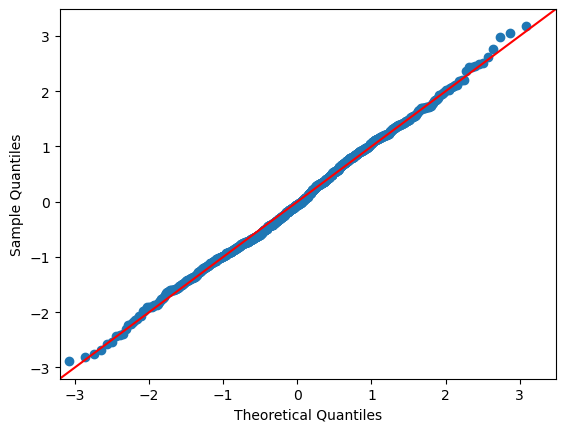

In [16]:
# Menggambar Plot QQ menggunakan package statmodels
import matplotlib.pyplot as plt
import scipy.stats as stats
fig = sm.qqplot(residual, stats.t, fit=True, line="45")
plt.show()

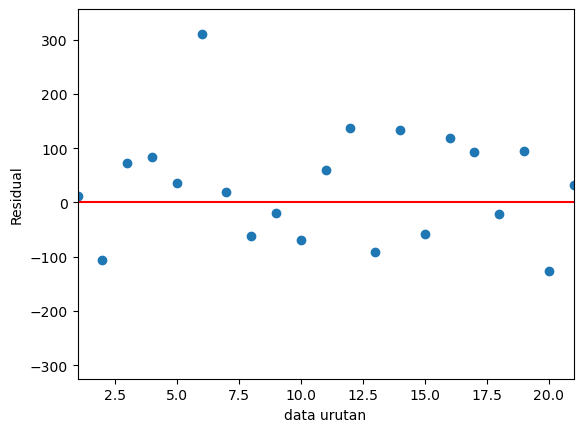

In [17]:
# Plot memeriksa asumsi residual tidak terjadi autokorelasi
urutan_pengamatan = pd.Series(range(len(residual)))
plt.scatter(urutan_pengamatan, residual);
plt.axhline(0, color='red')
plt.xlabel('data urutan');
plt.ylabel('Residual');
plt.xlim([1,21]);

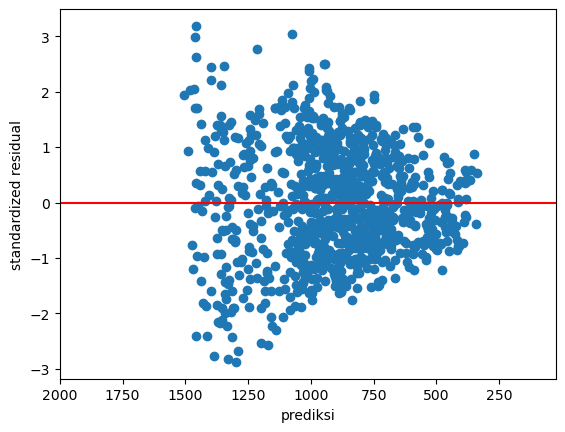

In [18]:
# Memeriksa asumsi residual tidak terjadi heteroskedastisitas
# Plot memeriksa asumsi residual tidak terjadi heteroskedastisitas
influence = model.get_influence()

# Menentukan standardized residualnya
std_residual = influence.resid_studentized_internal
plt.scatter(prediksi, std_residual);
plt.axhline(0, color='red')
plt.xlabel('prediksi');
plt.ylabel('standardized residual');
plt.xlim([2000,25]);

## 1. Memeriksa Asumsi Residual Berdistribusi Normal

In [19]:
# Pengujian Jarque Bera untuk memeriksa asumsi residual
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(model.resid)
lzip(name, test)

[('Jarque-Bera', 2.8587143673401507),
 ('Chi^2 two-tail prob.', 0.23946280338022438),
 ('Skew', 0.09076922873042013),
 ('Kurtosis', 2.8062042720728755)]

In [62]:
# Memeriksa asumsi residual berdistribusi normal

alpha = 0.05
df = 8
Chi_Square_tabel = stats.chi2.ppf(1 - alpha, df)
print("Nilai dari Tabel Chi-Square adalah", Chi_Square_tabel)

# Keputusan
JB = 2.8587143673402005
if JB > Chi_Square_tabel:
    print("Nilai dari Jarque-Bera adalah", JB)
    print("Sehingga H0 ditolak yang artinya tidak memenuhi asumsi berdistribusi normal.")
else:
    print("Nilai dari Jarque-Bera adalah", JB)
    print("Sehingga H0 diterima yang artinya residual memenuhi asumsi berdistribusi normal.")

Nilai dari Tabel Chi-Square adalah 15.50731305586545
Nilai dari Jarque-Bera adalah 2.8587143673402005
Sehingga H0 diterima yang artinya residual memenuhi asumsi berdistribusi normal.


## 2. Memeriksa Asumsi Residual Tidak Terjadi Autokorelasi

In [21]:
# Pengujian Durbin Watson
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(model.resid)
print(f"Durbin-Watson: {dw}")

Durbin-Watson: 2.1242144917039325


In [22]:
# Memeriksa asumsi residual tidak terjadi autokorelasi

dw = 2.1242144917039334
n = 973
k = 8

# Dengan melihat nilai batas bawah (dl) dan batas atas (du) untuk sampel sebanyak 40 dan variabel sebanyak 3 dalam tabel Durbin Watson,
# didapatkan nilai dl = 1,39083 dan du = 1,59999.
dl = 1.87854
du = 1.90823

# Memeriksa autokorelasi
if dw < dl:
    print("H0 ditolak yang artinya terjadi autokorelasi.")
elif dw > du:
    print("H0 gagal ditolak yang artinya tidak terjadi autokorelasi.")
elif dl <= dw <= du:
    print("Tidak dapat menarik kesimpulan dengan metode Durbin-Watson bahwa residual terjadi autokorelasi atau tidak")
else:
    print("Hasil uji tidak konklusif.")

H0 gagal ditolak yang artinya tidak terjadi autokorelasi.


## 3. Memeriksa Asusmsi Residual Tidak Terjadi Heteroskedastisitas

In [23]:
# Pengujian Breush-Pagan
from statsmodels.compat import lzip
import statsmodels.formula.api as smf

names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 167.98072631445518),
 ('p-value', 3.0707060082507404e-30),
 ('f-value', 20.073737859055136),
 ('f p-value', 5.41928118027565e-34)]

In [24]:
# Memeriksa asumsi residual terjadi heteroskedastisitas

BP = 167.98072631445538
alpha = 0.05
df = 8
Chi_Square_tabel = stats.chi2.ppf(1 - alpha, df)
print("Nilai dari Tabel Chi-Square adalah", Chi_Square_tabel)

# Keputusan
if BP > Chi_Square_tabel:
    print("Sehingga  H0 ditolak yang artinya asumsi residual terjadi heteroskedastisitas.")
else:
    print("Sehingga H0 diterima yang artinya asumsi residual tidak terjadi heteroskedastisitas.")

Nilai dari Tabel Chi-Square adalah 15.50731305586545
Sehingga  H0 ditolak yang artinya asumsi residual terjadi heteroskedastisitas.


## 4. Memeriksa Asumsi Residual Tidak Terjadi Multikolinearitas

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Himpunan variabel Independen
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]

# VIF DataFrame
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Menghitung VIF untuk setiap variabel
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

kesimpulan = """
Berdasarkan hasil output diatas, Terdapat beberapa nilai VIF variabel independen lebih dari 10. hal ini mengindikasi bahwa variabel independen terjadi multikolinearitas.
"""
print(kesimpulan)

  feature        VIF
0      x1  10.697016
1      x2  32.456612
2      x3  12.545087
3      x4  20.578837
4      x5  45.914307
5      x6  36.601443
6      x7  14.858934
7      x8   2.788836

Berdasarkan hasil output diatas, Terdapat beberapa nilai VIF variabel independen lebih dari 10. hal ini mengindikasi bahwa variabel independen terjadi multikolinearitas.

